In [1]:
import requests
import numpy as np
import pandas as pd
import os
import tweepy
from tweepy import OAuthHandler
consumer_key = 'XXXXXX'
consumer_secret = 'XXXXXX'
access_token = 'XXXXXX'
access_secret = 'XXXXXX'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

import json
from timeit import default_timer as timer

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm as cm

import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

## 1 Data Gathering

### 1.1 WeRateDogs Twitter Archive

In [2]:
original_df = pd.read_csv('twitter-archive-enhanced.csv', encoding='utf-8')
original_df.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


### 1.2 Dog Breed Image Predictions Data

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

folder_name = 'image-predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)
    

In [4]:
os.listdir(folder_name)

['image-predictions.tsv']

In [5]:
image_predictions_df = pd.read_csv(folder_name + '/image-predictions.tsv', sep='\t')
image_predictions_df.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


### 1.3 Twitter Retweet and Favorite Counts

In [6]:
api

In [7]:
tweet_ids = list(original_df.tweet_id)
tweet_data = {}
fails_dict = {}
start = timer()
for tweet_id in tweet_ids:
    try:
        tweet_status = api.get_status(tweet_id, tweet_mode='extended')         
        tweet_data[str(tweet_id)] = tweet_status._json
    except tweepy.TweepError as e:
        print("Error for: " +str(tweet_id))
        fails_dict[str(tweet_id)] = e

end = timer()
print(end - start)
print(fails_dict)  

Error for: 888202515573088257
Error for: 873697596434513921
Error for: 872668790621863937
Error for: 872261713294495745
Error for: 869988702071779329
Error for: 866816280283807744
Error for: 861769973181624320
Error for: 856602993587888130
Error for: 851953902622658560
Error for: 845459076796616705
Error for: 844704788403113984
Error for: 842892208864923648
Error for: 837366284874571778
Error for: 837012587749474308
Error for: 829374341691346946
Error for: 827228250799742977
Error for: 812747805718642688
Error for: 802247111496568832
Error for: 779123168116150273
Error for: 775096608509886464
Error for: 770743923962707968


Rate limit reached. Sleeping for: 786


Error for: 754011816964026368
Error for: 680055455951884288


Rate limit reached. Sleeping for: 768


Error for: 676975532580409345
1875.2284258060001
{'888202515573088257': TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), '873697596434513921': TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), '872668790621863937': TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), '872261713294495745': TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), '869988702071779329': TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), '866816280283807744': TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), '861769973181624320': TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), '856602993587888130': TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), '851953902622658560': TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), '845459076796616705': TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 

In [8]:
print("%d Twitter handles were not found."% len (fails_dict))

24 Twitter handles were not found.


In [9]:
#Write the data into text file with JSON structure
with open('tweet_json.txt', 'w') as file:
    json.dump(tweet_data, file)

In [10]:
#Read and confirm the text file in json format
with open('tweet_json.txt') as file:
    data = json.load(file)
    

tweets_info_list = []
for tweet_id in data.keys():
    retweets = data[tweet_id]['retweet_count']
    favorites = data[tweet_id]['favorite_count']
    tweets_info_list.append({'tweet_id': tweet_id, 'retweets' : retweets,
                             'favorites': favorites
                             })
    
tweets_info_df = pd.DataFrame(tweets_info_list, columns = ['tweet_id', 'retweets', 'favorites'])
tweets_info_df.sample(3)

,tweet_id,retweets,favorites
2207,668226093875376128,101,293
1958,672968025906282496,533,1302
1311,705442520700944385,1651,4505


## 2 Data Assessment
### 2.1 WeRateDogs Twitter Archive

In [11]:
original_df.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [12]:
original_df.shape

(2356, 17)

In [13]:
#Checking for duplicates
original_df.tweet_id.duplicated().sum()

0

In [14]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [15]:
original_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [16]:
original_df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

Most of the datapoints in the following columns are null:
- in_reply_to_status_id
- in_reply_to_user_id
- retweeted_status_id
- retweeted_status_user_id
- retweeted_status_timestamp

In [17]:
#Checking the dog names
dog_names_list = []
dog_names_list = original_df['name'].unique()
dog_names_list.sort()
dog_names_list
#dog_names_list.to_csv('dog_names_list.csv')

array(['Abby', 'Ace', 'Acro', 'Adele', 'Aiden', 'Aja', 'Akumi', 'Al',
       'Albert', 'Albus', 'Aldrick', 'Alejandro', 'Alexander',
       'Alexanderson', 'Alf', 'Alfie', 'Alfy', 'Alice', 'Amber',
       'Ambrose', 'Amy', 'Amélie', 'Anakin', 'Andru', 'Andy', 'Angel',
       'Anna', 'Anthony', 'Antony', 'Apollo', 'Aqua', 'Archie', 'Arlen',
       'Arlo', 'Arnie', 'Arnold', 'Arya', 'Ash', 'Asher', 'Ashleigh',
       'Aspen', 'Astrid', 'Atlas', 'Atticus', 'Aubie', 'Augie', 'Autumn',
       'Ava', 'Axel', 'Bailey', 'Baloo', 'Balto', 'Banditt', 'Banjo',
       'Barclay', 'Barney', 'Baron', 'Barry', 'Batdog', 'Bauer', 'Baxter',
       'Bayley', 'BeBe', 'Bear', 'Beau', 'Beckham', 'Beebop', 'Beemo',
       'Bell', 'Bella', 'Belle', 'Ben', 'Benedict', 'Benji', 'Benny',
       'Bentley', 'Berb', 'Berkeley', 'Bernie', 'Bert', 'Bertson',
       'Betty', 'Beya', 'Biden', 'Bilbo', 'Billl', 'Billy', 'Binky',
       'Birf', 'Bisquick', 'Blakely', 'Blanket', 'Blipson', 'Blitz',
       'Bloo', 'Bloop',

There are non-names in the 'name' column.

In [18]:
#Checking the rating values for the numerator 
original_df['rating_numerator'].value_counts().sort_values()

20        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
26        1
182       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
143       1
24        1
204       1
80        1
121       1
75        2
15        2
0         2
420       2
2         9
1         9
4        17
3        19
6        32
5        37
14       54
7        55
8       102
9       158
13      351
10      461
11      464
12      558
Name: rating_numerator, dtype: int64

In [19]:
#Checking the rating values for the denominator
original_df['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [20]:
#identify the rating with 0
original_df[original_df['rating_denominator'] == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


- There is one row that has a 0 denominator.

In [21]:
#identify retweets
original_df[original_df['retweeted_status_id'].notnull()].count()

tweet_id                      181
in_reply_to_status_id           0
in_reply_to_user_id             0
timestamp                     181
source                        181
text                          181
retweeted_status_id           181
retweeted_status_user_id      181
retweeted_status_timestamp    181
expanded_urls                 180
rating_numerator              181
rating_denominator            181
name                          181
doggo                         181
floofer                       181
pupper                        181
puppo                         181
dtype: int64

In [22]:
original_df[original_df['retweeted_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


- There are 181 retweets.

original_df Column Descriptions:
- **tweet_id**: The unique identifier for each tweet.
- **in_reply_to_status_id**: The id provided for the tweet for which a given tweet is a reply. 
- **in_reply_to_user_id**: The user_id provided for the tweet for which a given tweet is a reply. 
- **timestamp**: Date and time the tweet was created.
- **source**: The URL source for a given tweet.
- **text**: The text of a tweet.
- **retweeted_status_id**: The status id original tweet for which this is a retweet. 
- **retweeted_status_user_id**: The user id original tweet for which this is a retweet. 
- **retweeted_status_timestamp**: Date and time the retweet was created.
- **expanded_urls**: Expanded version of url1; URL entered by user and displayed in Twitter. Note that the user-entered URL may itself be a shortened URL, e.g. from bit.ly.
- **rating_numerator**: The ranking given by the user.
- **rating_denominator**: The reference ranking given by the user. 
- **name**: The name of the dog.
- **doggo**, **floofer**,  **pupper**, **puppo** -- The stage of the dog.

Observations:
- Unnecessary **source** column.
- The **rating_numerator** and **rating_denominator** values appear to be arbitrary and do not share a combined scale.
- There is one observation that has a **rating_denominator** value of 0.
- There are invalid **rating_numerator** values that contain decimals.
- **tweet_id, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id,** and **retweeted_status_user_id** are not strings.
- **timestamp** and **retweeted_status_timestamp** are not in datetime format.
- **doggo, floofer, pupper,** and **puppo** all appear to be different aspects of the same variable.
- **in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id,** and **retweeted_status_timestamp** all appear to be NaN values for most of the observations in the dataset.
- There are 181 retweets.
- There are non-names in the **name** column.

### 2.2 Dog Breed Image Predictions Data

In [23]:
image_predictions_df.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [24]:
image_predictions_df.shape

(2075, 12)

In [25]:
image_predictions_df.tweet_id.duplicated().sum()

0

In [26]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [27]:
image_predictions_df.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [28]:
image_predictions_df[image_predictions_df['img_num'].isnull()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [29]:
image_predictions_df[image_predictions_df['img_num'] == 0]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


- All predictions have at least one image.

image_predictions_df Column Descriptions:
- **tweet_id**: The unique ID of a given tweet.
- **jpg_url**: The URL for the tweet's image. 
- **img_num**: The number of images associated with a given tweet.
- **p1**: The top prediction produced by the algortihm for the breed of the dog in the image.
- **p1_conf**: The p-value or confidence associated with the algorithm's top prediction for the image in the tweet. 
- **p1_dog**: A boolean value reporting whether or not the top prediction is a breed of dog. 
- **p2**: The second most-likely prediction produced by the algortihm for the breed of the dog in the image.
- **p2_conf**: The p-value or confidence associated with the algorithm's second most-likely prediction for the image in the tweet. 
- **p2_dog**:  A boolean value reporting whether or not the second most-likely prediction is a breed of dog. 
- **p3**: The third most-likely prediction produced by the algortihm for the breed of the dog in the image.
- **p3_conf**: The p-value or confidence associated with the algorithm's third most-likely prediction for the image in the twee
- **p3_dog**: A boolean value reporting whether or not the third most-likely prediction is a breed of dog. 

image_predictions_df Observations:
- **tweet_id** is not a string
- Not all of the tweets have at least one image.

### 2.3 Twitter Retweet and Favorite Counts

In [30]:
tweets_info_df.sample(5)

,tweet_id,retweets,favorites
1483,691793053716221953,4296,8288
59,880465832366813184,5816,27247
1871,674742531037511680,50,485
2016,671544874165002241,1028,1944
1393,698703483621523456,385,1471


In [31]:
tweets_info_df.shape

(2332, 3)

In [32]:
tweets_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2332 entries, 0 to 2331
Data columns (total 3 columns):
tweet_id     2332 non-null object
retweets     2332 non-null int64
favorites    2332 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.7+ KB


In [33]:
#identify the ratings with 0
favorite_counts = tweets_info_df[tweets_info_df['favorites'] == 0]
print(favorite_counts)

                tweet_id  retweets  favorites
31    886054160059072513       101          0
35    885311592912609280     17271          0
67    879130579576475649      6349          0
72    878404777348136964      1203          0
73    878316110768087041      6230          0
77    877611172832227328        74          0
90    874434818259525634     13678          0
95    873337748698140672      1495          0
105   871166179821445120      5399          0
119   868639477480148993      1975          0
125   867072653475098625       116          0
131   866094527597207552      8024          0
140   863471782782697472      2334          0
152   860981674716409858      2081          0
153   860924035999428608       781          0
158   860177593139703809     29968          0
164   858860390427611136      7903          0
173   857062103051644929       166          0
177   856330835276025856       652          0
186   855245323840757760      5864          0
187   855138241867124737        44

In [34]:
print("%d tweets have a favorite count of zero and should be removed from the dataset."% len (favorite_counts))

165 tweets have a favorite count of zero and should be removed from the dataset.


In [35]:
#identify the rating with 0
tweets_info_df[tweets_info_df['retweets'] == 0].count()

tweet_id     0
retweets     0
favorites    0
dtype: int64

- All of the tweets collected have at least 1 retweet.

tweets_info_df Column Descriptions:
    
- **tweet_id**: The unique identifier for each tweet.
- **retweets**: The count of retweets for a given tweet (by user).
- **favorites**: The count of favorites for a given tweet (by user).

tweets_info_df Observations:
- **tweet_id** is a string!
- 165 tweets have a **favorite** count of zero.
- All of the tweets collected have at least 1 retweet.


<a id="3-data-cleaning"></a>
## 3 Data Cleaning

The following cleaning actions for *tidiness* are conducted below:
1. There will be one column for **stage** that is combined from **doggo, floofer, pupper,** and **puppo**.
2. Create one universal dataset from the three individual tables so that it is more useful for analysis.
3. The **source** column is unecessary and should be removed..

The following cleaning actions for *quality* are conducted below:
1. Remove all tweets for whom the user ID is no longer valid on Twitter.
2. Remove all retweet observations.
3. Remove the **retweeted_status_id, retweeted_status_user_id,** and **retweeted_status_timestamp** columns once retweets have been removed.
4. Convert all **tweet_id** fields to strings.
5. Convert the **timestamp** column into datetime format
6. Remove 0 denominator observations for ratings.
7. Correct erroneous numerator/denominators.
8. Correct erroneous dog names that currently have invalid values (e.g. a, an, the, officially).
9. Remove all tweets that do not have at least one image.

<a id="3-1-copy-dataframes"></a>
### 3.1 Copy the Dataframes
#### 3.1.1 Define
Make a copy of the dataframes.

#### 3.1.2 Code

In [36]:
archive_clean = original_df.copy()
tweets_clean = tweets_info_df.copy()
image_predictions_clean = image_predictions_df.copy()

#### 3.1.3 Test

In [37]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [38]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2332 entries, 0 to 2331
Data columns (total 3 columns):
tweet_id     2332 non-null object
retweets     2332 non-null int64
favorites    2332 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.7+ KB


In [39]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


<a id="3-2-convert-id-source"></a>
### 3.2 Convert all _id fields to strings and remove source column

#### 3.2.1 Define
Convert tweet_id fields to string format for image_predictions_clean and archive_clean, as well as remove the source column.

#### 3.2.2 Code

In [40]:
archive_clean['tweet_id'] = archive_clean['tweet_id'].astype(str)
image_predictions_clean['tweet_id'] = image_predictions_clean['tweet_id'].astype(str)
archive_clean.drop(['source'], axis=1,inplace= True)

#### 3.2.3 Test

In [41]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), object(10)
memory usage: 294.6+ KB


In [42]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


<a id="3-3-join-datasets"></a>
### 3.3 Join All Three Datasets
#### 3.3.1 Define
Join all three datasets with tweet_id as the key value. This will remove all of the tweets that do not have an active twitter user, as well as those tweets that do not contain an image that was available for use by the prediction algorithm.

#### 3.3.2 Code

In [43]:
archive_clean = pd.merge(archive_clean, tweets_clean, how = 'inner', on = 'tweet_id')
archive_clean = pd.merge(archive_clean, image_predictions_clean, how = 'inner', on = 'tweet_id')

#### 3.3.3 Test

In [44]:
archive_clean.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1798,670786190031921152,NaN,NaN,2015-11-29 02:07:44 +0000,This is Creg. You offered him a ride to work b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670786190...,8,...,1,dingo,0.777124,False,Pembroke,0.127438,True,Cardigan,0.024007,True
1963,667724302356258817,NaN,NaN,2015-11-20 15:20:54 +0000,What a dog to start the day with. Very calm. L...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667724302...,7,...,1,ibex,0.619098,False,bighorn,0.125119,False,ram,0.074673,False
680,765395769549590528,NaN,NaN,2016-08-16 03:52:26 +0000,This is my dog. Her name is Zoey. She knows I'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/765395769...,13,...,1,Pembroke,0.509491,True,Cardigan,0.330401,True,Shetland_sheepdog,0.038875,True


In [45]:
archive_clean.shape

(2060, 29)

In [46]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2060 entries, 0 to 2059
Data columns (total 29 columns):
tweet_id                      2060 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2060 non-null object
text                          2060 non-null object
retweeted_status_id           74 non-null float64
retweeted_status_user_id      74 non-null float64
retweeted_status_timestamp    74 non-null object
expanded_urls                 2060 non-null object
rating_numerator              2060 non-null int64
rating_denominator            2060 non-null int64
name                          2060 non-null object
doggo                         2060 non-null object
floofer                       2060 non-null object
pupper                        2060 non-null object
puppo                         2060 non-null object
retweets                      2060 non-null int64
favorites                     2060 

<a id="3-4-remove-retweets-replies"></a>
### 3.4 Remove Retweets and Replies
#### 3.4.1 Define
Remove all retweets from the combined dataset.

#### 3.4.2 Code

In [47]:
archive_clean[archive_clean['retweeted_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
32,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,...,1,Labrador_retriever,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True
67,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,...,1,Irish_setter,0.364729,True,golden_retriever,0.202907,True,Irish_terrier,0.107473,True
107,867072653475098625,NaN,NaN,2017-05-23 17:40:04 +0000,RT @rachaeleasler: these @dog_rates hats are 1...,8.650134e+17,7.874618e+17,2017-05-18 01:17:25 +0000,https://twitter.com/rachaeleasler/status/86501...,13,...,1,Blenheim_spaniel,0.352946,True,papillon,0.211766,True,Pekinese,0.112952,True
130,860924035999428608,NaN,NaN,2017-05-06 18:27:40 +0000,RT @tallylott: h*ckin adorable promposal. 13/1...,8.609145e+17,3.638908e+08,2017-05-06 17:49:42 +0000,https://twitter.com/tallylott/status/860914485...,13,...,2,envelope,0.933016,False,oscilloscope,0.012591,False,paper_towel,0.011178,False
167,851861385021730816,NaN,NaN,2017-04-11 18:15:55 +0000,RT @eddie_coe98: Thanks @dog_rates completed m...,8.482894e+17,3.410211e+08,2017-04-01 21:42:03 +0000,https://twitter.com/eddie_coe98/status/8482893...,10,...,1,pencil_box,0.662183,False,purse,0.066505,False,pillow,0.044725,False
182,847971574464610304,NaN,NaN,2017-04-01 00:39:12 +0000,RT @basic_vacek_: I love my new mug easy 13/10...,8.479710e+17,5.970642e+08,2017-04-01 00:36:55 +0000,https://twitter.com/basic_vacek_/status/847971...,13,...,1,coffee_mug,0.633652,False,cup,0.273392,False,toilet_tissue,0.066656,False
209,841833993020538882,NaN,NaN,2017-03-15 02:10:39 +0000,RT @dog_rates: This is Ken. His cheeks are mag...,8.174239e+17,4.196984e+09,2017-01-06 17:33:29 +0000,https://twitter.com/dog_rates/status/817423860...,13,...,1,ice_bear,0.336200,False,Samoyed,0.201358,True,Eskimo_dog,0.186789,True
220,839290600511926273,NaN,NaN,2017-03-08 01:44:07 +0000,RT @alexmartindawg: THE DRINK IS DR. PUPPER 10...,8.392899e+17,4.119842e+07,2017-03-08 01:41:24 +0000,https://twitter.com/alexmartindawg/status/8392...,10,...,1,web_site,0.670892,False,monitor,0.101565,False,screen,0.075306,False
223,838916489579200512,NaN,NaN,2017-03-07 00:57:32 +0000,RT @KibaDva: I collected all the good dogs!! 1...,8.389060e+17,8.117408e+08,2017-03-07 00:15:46 +0000,https://twitter.com/KibaDva/status/83890598062...,15,...,2,web_site,0.993651,False,monitor,0.001406,False,envelope,0.001093,False
255,832769181346996225,NaN,NaN,2017-02-18 01:50:19 +0000,RT @EmilieGambril: 12/10 h*cking excited about...,8.327664e+17,4.871977e+08,2017-02-18 01:39:12 +0000,https://twitter.com/EmilieGambril/status/83276...,12,...,1,jersey,0.895698,False,sweatshirt,0.089085,False,poncho,0.002975,False


In [48]:
archive_clean = archive_clean[archive_clean['retweeted_status_id'].isnull()]

In [49]:
archive_clean[archive_clean['in_reply_to_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
121,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,Ladies and gentlemen... I found Pipsy. He may ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547...,14,...,1,Lakeland_terrier,0.275242,True,Airedale,0.190569,True,teddy,0.102595,False
149,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52 +0000,"THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856526610...,14,...,1,Old_English_sheepdog,0.798481,True,Tibetan_terrier,0.060602,True,standard_poodle,0.040722,True
197,844979544864018432,7.590995e+17,4.196984e+09,2017-03-23 18:29:57 +0000,PUPDATE: I'm proud to announce that Toby is 23...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/844979544...,13,...,3,tennis_ball,0.999281,False,racket,0.000370,False,Shetland_sheepdog,0.000132,True
448,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11,...,1,Labrador_retriever,0.897162,True,beagle,0.016895,True,Rhodesian_ridgeback,0.012061,True
821,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,...,1,traffic_light,0.470708,False,fountain,0.199776,False,space_shuttle,0.064807,False
823,746818907684614144,6.914169e+17,4.196984e+09,2016-06-25 21:34:37 +0000,Guys... Dog Jesus 2.0\n13/10 buoyant af https:...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746818907...,13,...,1,dingo,0.175518,False,timber_wolf,0.133647,False,Ibizan_hound,0.101537,True
920,729838605770891264,7.291135e+17,4.196984e+09,2016-05-10 01:00:58 +0000,"""Challenge completed"" \n(pupgraded to 12/10) h...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/729838605...,12,...,1,stone_wall,0.758218,False,patio,0.074205,False,prison,0.013826,False
1101,705786532653883392,7.032559e+17,4.196984e+09,2016-03-04 16:06:36 +0000,"Seriously, add us 🐶 11/10 for sad wet pupper h...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/705786532...,11,...,1,web_site,0.550294,False,Labrador_retriever,0.148496,True,golden_retriever,0.148482,True
1110,704871453724954624,6.671522e+17,4.196984e+09,2016-03-02 03:30:25 +0000,I found a forest Pipsy. 12/10 https://t.co/mIQ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704871453...,12,...,1,Norfolk_terrier,0.689504,True,soft-coated_wheaten_terrier,0.101480,True,Norwich_terrier,0.055779,True
1125,703425003149250560,7.030419e+17,4.196984e+09,2016-02-27 03:42:44 +0000,Really guys? Again? I know this is a rare Alba...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/703425003...,9,...,1,miniature_pinscher,0.292866,True,sleeping_bag,0.142122,False,Italian_greyhound,0.070849,True


In [50]:
archive_clean = archive_clean[archive_clean['in_reply_to_status_id'].isnull()]

#### 3.4.3 Test

In [51]:
archive_clean[archive_clean['retweeted_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [52]:
archive_clean[archive_clean['in_reply_to_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [53]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 0 to 2059
Data columns (total 29 columns):
tweet_id                      1963 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1963 non-null object
text                          1963 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1963 non-null object
rating_numerator              1963 non-null int64
rating_denominator            1963 non-null int64
name                          1963 non-null object
doggo                         1963 non-null object
floofer                       1963 non-null object
pupper                        1963 non-null object
puppo                         1963 non-null object
retweets                      1963 non-null int64
favorites                     1963 non-n

<a id="3-5-remove-retweet-reply-col"></a>
### 3.5 Remove Retweet and Reply Data Columns
#### 3.5.1 Define
Remove unnecessary columns that held retweet and reply metadata, now that those observations are no longer in the dataset.

#### 3.5.2 Code

In [54]:
archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis=1,inplace= True)

#### 3.5.3 Test

In [55]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 0 to 2059
Data columns (total 24 columns):
tweet_id              1963 non-null object
timestamp             1963 non-null object
text                  1963 non-null object
expanded_urls         1963 non-null object
rating_numerator      1963 non-null int64
rating_denominator    1963 non-null int64
name                  1963 non-null object
doggo                 1963 non-null object
floofer               1963 non-null object
pupper                1963 non-null object
puppo                 1963 non-null object
retweets              1963 non-null int64
favorites             1963 non-null int64
jpg_url               1963 non-null object
img_num               1963 non-null int64
p1                    1963 non-null object
p1_conf               1963 non-null float64
p1_dog                1963 non-null bool
p2                    1963 non-null object
p2_conf               1963 non-null float64
p2_dog                1963 non-null bo

<a id="3-6-timestamp"></a>
### 3.6 Convert Timestamp
#### 3.6.1 Define
Convert the **timestamp** column into datetime format.

#### 3.6.2 Code

In [56]:
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)

#### 3.6.3 Test

In [57]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 0 to 2059
Data columns (total 24 columns):
tweet_id              1963 non-null object
timestamp             1963 non-null datetime64[ns, UTC]
text                  1963 non-null object
expanded_urls         1963 non-null object
rating_numerator      1963 non-null int64
rating_denominator    1963 non-null int64
name                  1963 non-null object
doggo                 1963 non-null object
floofer               1963 non-null object
pupper                1963 non-null object
puppo                 1963 non-null object
retweets              1963 non-null int64
favorites             1963 non-null int64
jpg_url               1963 non-null object
img_num               1963 non-null int64
p1                    1963 non-null object
p1_conf               1963 non-null float64
p1_dog                1963 non-null bool
p2                    1963 non-null object
p2_conf               1963 non-null float64
p2_dog                196

<a id="3-7-ratings-denominator"></a>
### 3.7 Remove Ratings with a 0 Denominator
#### 3.7.1 Define
Remove observations that have a rating with a 0 denominator, as it will not allow for division in analysis.

#### 3.7.2 Code

In [58]:
archive_clean[archive_clean['rating_denominator'] == 0]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


#### 3.7.3 Test
Previous cleaning operations have rendered this process already accomplished.

<a id="3-8-ratings-corr"></a>
### 3.8 Correct erroneous ratings (numerators and denominators)
#### 3.8.1 Define
During the visual assessment phase, it was noted that some of the rating_numerator values are entirely incorrect. The rating_numerator field should be changed to a float and then the invalid values should be identified and corrected.

#### 3.8.2 Code

In [59]:
archive_clean['rating_numerator'] = archive_clean['rating_numerator'].astype(float)
archive_clean['rating_denominator'] = archive_clean['rating_denominator'].astype(float)
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 0 to 2059
Data columns (total 24 columns):
tweet_id              1963 non-null object
timestamp             1963 non-null datetime64[ns, UTC]
text                  1963 non-null object
expanded_urls         1963 non-null object
rating_numerator      1963 non-null float64
rating_denominator    1963 non-null float64
name                  1963 non-null object
doggo                 1963 non-null object
floofer               1963 non-null object
pupper                1963 non-null object
puppo                 1963 non-null object
retweets              1963 non-null int64
favorites             1963 non-null int64
jpg_url               1963 non-null object
img_num               1963 non-null int64
p1                    1963 non-null object
p1_conf               1963 non-null float64
p1_dog                1963 non-null bool
p2                    1963 non-null object
p2_conf               1963 non-null float64
p2_dog               

In [60]:
archive_clean[archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

,text,rating_numerator
40,This is Bella. She hopes her smile made you sm...,5.0
548,"This is Logan, the Chow who lived. He solemnly...",75.0
603,This is Sophie. She's a Jubilant Bush Pupper. ...,27.0
1440,Here we have uncovered an entire battalion of ...,26.0


In [61]:
archive_clean.text[40]

'This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948'

In [62]:
archive_clean.rating_numerator[40]


5.0

In [63]:
archive_clean.rating_denominator[40]

10.0

In [64]:
archive_clean.rating_numerator[40] = 13.5
archive_clean.rating_numerator[40]

13.5

In [65]:
archive_clean.text[548]

"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS"

In [66]:
archive_clean.rating_numerator[548]

75.0

In [67]:
archive_clean.rating_denominator[548]

10.0

In [68]:
archive_clean.rating_numerator[548] = 9.75
archive_clean.rating_numerator[548]

9.75

In [69]:
archive_clean.text[603]

"This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq"

In [70]:
archive_clean.rating_numerator[603]

27.0

In [71]:
archive_clean.rating_denominator[603]

10.0

In [72]:
archive_clean.rating_numerator[603] = 11.27
archive_clean.rating_numerator[603]

11.27

In [73]:
archive_clean.text[1440]

'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD'

In [74]:
archive_clean.rating_numerator[1440]

26.0

In [75]:
archive_clean.rating_denominator[1440]

10.0

In [76]:
archive_clean.rating_numerator[1440] = 11.26
archive_clean.rating_numerator[1440]

11.26

<a id="3-9-names"></a>
### 3.9 Identify (if possible) Dog Names Where Non-Names Currently Exist
#### 3.9.1 Define
During the Assessment phase, it was noted that there was a series of entries in the **name** column that were not actually dog names: 'a', 'actually', 'all', 'an', 'by', 'getting', 'his', 'incredibly', 'infuriating', 'just', 'life', 'light', 'mad', 'my', 'not', 'officially', 'old', 'one', 'quite', 'space', 'such', 'the', 'this', 'unacceptable', 'very'. If there are names present in the tweets, we need to manually correct them. Otherwise, we need to insert None.

#### 3.9.2 Code

In [77]:
archive_clean.text[archive_clean.name =='a']

50      Here is a pupper approaching maximum borkdrive...
514     Here is a perfect example of someone who has t...
636     Guys this is getting so out of hand. We only r...
811     This is a mighty rare blue-tailed hammer sherk...
813     Viewer discretion is advised. This is a terrib...
822     This is a carrot. We only rate dogs. Please on...
848     This is a very rare Great Alaskan Bush Pupper....
984     People please. This is a Deadly Mediterranean ...
994     This is a taco. We only rate dogs. Please only...
1111    Here is a heartbreaking scene of an incredible...
1120    Here is a whole flock of puppers.  60/50 I'll ...
1130    This is a Butternut Cumberfloof. It's not wind...
1136    This is a Wild Tuscan Poofwiggle. Careful not ...
1148    "Pupper is a present to world. Here is a bow f...
1251    This is a rare Arctic Wubberfloof. Unamused by...
1463    Guys this really needs to stop. We've been ove...
1506    This is a dog swinging. I really enjoyed it so...
1567    This i

In [78]:
archive_clean.text[archive_clean.name =='a'].count()

55

In [79]:
archive_clean.text[archive_clean.name =='a'][1568]

'Seriously guys?! Only send in dogs. I only rate dogs. This is a baby black bear... 11/10 https://t.co/H7kpabTfLj'

In [80]:
name_id = archive_clean.tweet_id[archive_clean.name =='a'][1568]
archive_clean.name[archive_clean.tweet_id == name_id] = 'Wylie'
archive_clean.name[archive_clean.tweet_id == name_id]

1568    Wylie
Name: name, dtype: object

In [81]:
archive_clean.text[archive_clean.name =='a'][1664]

'This is a Lofted Aphrodisiac Terrier named Kip. Big fan of bed n breakfasts. Fits perfectly. 10/10 would pet firmly https://t.co/gKlLpNzIl3'

In [82]:
name_id = archive_clean.tweet_id[archive_clean.name =='a'][1664]
archive_clean.name[archive_clean.tweet_id == name_id] = 'Kip'
archive_clean.name[archive_clean.tweet_id == name_id]

1664    Kip
Name: name, dtype: object

In [83]:
archive_clean.text[archive_clean.name =='a'][1743]

'This is a Tuscaloosa Alcatraz named Jacob (Yacōb). Loves to sit in swing. Stellar tongue. 11/10 look at his feet https://t.co/2IslQ8ZSc7'

In [84]:
name_id = archive_clean.tweet_id[archive_clean.name =='a'][1743]
archive_clean.name[archive_clean.tweet_id == name_id] = 'Jacob'
archive_clean.name[archive_clean.tweet_id == name_id]

1743    Jacob
Name: name, dtype: object

In [85]:
archive_clean.text[archive_clean.name =='a'][1774]

"This is a Helvetica Listerine named Rufus. This time Rufus will be ready for the UPS guy. He'll never expect it 9/10 https://t.co/34OhVhMkVr"

In [86]:
name_id = archive_clean.tweet_id[archive_clean.name =='a'][1774]
archive_clean.name[archive_clean.tweet_id == name_id] = 'Rufus'
archive_clean.name[archive_clean.tweet_id == name_id]

1774    Rufus
Name: name, dtype: object

In [87]:
archive_clean.text[archive_clean.name =='a'][1824]

'This is a Deciduous Trimester mix named Spork. Only 1 ear works. No seat belt. Incredibly reckless. 9/10 still cute https://t.co/CtuJoLHiDo'

In [88]:
name_id = archive_clean.tweet_id[archive_clean.name =='a'][1824]
archive_clean.name[archive_clean.tweet_id == name_id] = 'Spork'
archive_clean.name[archive_clean.tweet_id == name_id]

1824    Spork
Name: name, dtype: object

In [89]:
archive_clean.text[archive_clean.name =='a'][1833]

"This is a Rich Mahogany Seltzer named Cherokee. Just got destroyed by a snowball. Isn't very happy about it. 9/10 https://t.co/98ZBi6o4dj"

In [90]:
name_id = archive_clean.tweet_id[archive_clean.name =='a'][1833]
archive_clean.name[archive_clean.tweet_id == name_id] = 'Cherokee'
archive_clean.name[archive_clean.tweet_id == name_id]

1833    Cherokee
Name: name, dtype: object

In [91]:
archive_clean.text[archive_clean.name =='a'][1836]

"This is a Speckled Cauliflower Yosemite named Hemry. He's terrified of intruder dog. Not one bit comfortable. 9/10 https://t.co/yV3Qgjh8iN"

In [92]:
name_id = archive_clean.tweet_id[archive_clean.name =='a'][1836]
archive_clean.name[archive_clean.tweet_id == name_id] = 'Hemry'
archive_clean.name[archive_clean.tweet_id == name_id]

1836    Hemry
Name: name, dtype: object

In [93]:
archive_clean.text[archive_clean.name =='a'][1854]

"This is a spotted Lipitor Rumpelstiltskin named Alphred. He can't wait for the Turkey. 10/10 would pet really well https://t.co/6GUGO7azNX"

In [94]:
name_id = archive_clean.tweet_id[archive_clean.name =='a'][1854]
archive_clean.name[archive_clean.tweet_id == name_id] = 'Alphred'
archive_clean.name[archive_clean.tweet_id == name_id]

1854    Alphred
Name: name, dtype: object

In [95]:
archive_clean.text[archive_clean.name =='a'][1868]

'This is a Coriander Baton Rouge named Alfredo. Loves to cuddle with smaller well-dressed dog. 10/10 would hug lots https://t.co/eCRdwouKCl'

In [96]:
name_id = archive_clean.tweet_id[archive_clean.name =='a'][1868]
archive_clean.name[archive_clean.tweet_id == name_id] = 'Alfredo'
archive_clean.name[archive_clean.tweet_id == name_id]

1868    Alfredo
Name: name, dtype: object

In [97]:
archive_clean.text[1897]

'This is a Slovakian Helter Skelter Feta named Leroi. Likes to skip on roofs. Good traction. Much balance. 10/10 wow! https://t.co/Dmy2mY2Qj5'

In [98]:
name_id = archive_clean.tweet_id[1897]
archive_clean.name[archive_clean.tweet_id == name_id] = 'Leroi'
archive_clean.name[archive_clean.tweet_id == name_id]

1897    Leroi
Name: name, dtype: object

In [99]:
archive_clean.text[archive_clean.name =='a'][1923]

'This is a Birmingham Quagmire named Chuk. Loves to relax and watch the game while sippin on that iced mocha. 10/10 https://t.co/HvNg9JWxFt'

In [100]:
name_id = archive_clean.tweet_id[archive_clean.name =='a'][1923]
archive_clean.name[archive_clean.tweet_id == name_id] = 'Chuk'
archive_clean.name[archive_clean.tweet_id == name_id]

1923    Chuk
Name: name, dtype: object

In [101]:
archive_clean.text[archive_clean.name =='a'][1940]

'This is a Trans Siberian Kellogg named Alfonso. Huge ass eyeballs. Actually Dobby from Harry Potter. 7/10 https://t.co/XpseHBlAAb'

In [102]:
name_id = archive_clean.tweet_id[archive_clean.name =='a'][1940]
archive_clean.name[archive_clean.tweet_id == name_id] = 'Alfonso'
archive_clean.name[archive_clean.tweet_id == name_id]

1940    Alfonso
Name: name, dtype: object

In [103]:
archive_clean.text[archive_clean.name =='a'][1954]

'This is a Shotokon Macadamia mix named Cheryl. Sophisticated af. Looks like a disappointed librarian. Shh (lol) 9/10 https://t.co/J4GnJ5Swba'

In [104]:
name_id = archive_clean.tweet_id[archive_clean.name =='a'][1954]
archive_clean.name[archive_clean.tweet_id == name_id] = 'Cheryl'
archive_clean.name[archive_clean.tweet_id == name_id]

1954    Cheryl
Name: name, dtype: object

In [105]:
archive_clean.text[archive_clean.name =='a'][1960]

'This is a rare Hungarian Pinot named Jessiga. She is either mid-stroke or got stuck in the washing machine. 8/10 https://t.co/ZU0i0KJyqD'

In [106]:
name_id = archive_clean.tweet_id[archive_clean.name =='a'][1960]
archive_clean.name[archive_clean.tweet_id == name_id] = 'Jessiga'
archive_clean.name[archive_clean.tweet_id == name_id]

1960    Jessiga
Name: name, dtype: object

In [107]:
archive_clean.text[archive_clean.name =='a'][1969]

'This is a southwest Coriander named Klint. Hat looks expensive. Still on house arrest :(\n9/10 https://t.co/IQTOMqDUIe'

In [108]:
name_id = archive_clean.tweet_id[archive_clean.name =='a'][1969]
archive_clean.name[archive_clean.tweet_id == name_id] = 'Klint'
archive_clean.name[archive_clean.tweet_id == name_id]

1969    Klint
Name: name, dtype: object

In [109]:
archive_clean.text[archive_clean.name =='a'][1978]

'This is a northern Wahoo named Kohl. He runs this town. Chases tumbleweeds. Draws gun wicked fast. 11/10 legendary https://t.co/J4vn2rOYFk'

In [110]:
name_id = archive_clean.tweet_id[archive_clean.name =='a'][1978]
archive_clean.name[archive_clean.tweet_id == name_id] = 'Kohl'
archive_clean.name[archive_clean.tweet_id == name_id]

1978    Kohl
Name: name, dtype: object

In [111]:
archive_clean.text[archive_clean.name =='a'][1992]

"This is a Dasani Kingfisher from Maine. His name is Daryl. Daryl doesn't like being swallowed by a panda. 8/10 https://t.co/jpaeu6LNmW"

In [112]:
name_id = archive_clean.tweet_id[archive_clean.name =='a'][1992]
archive_clean.name[archive_clean.tweet_id == name_id] = 'Daryl'
archive_clean.name[archive_clean.tweet_id == name_id]

1992    Daryl
Name: name, dtype: object

In [113]:
archive_clean.text[archive_clean.name =='a'][2015]

'This is a purebred Bacardi named Octaviath. Can shoot spaghetti out of mouth. 10/10 https://t.co/uEvsGLOFHa'

In [114]:
name_id = archive_clean.tweet_id[archive_clean.name =='a'][2015]
archive_clean.name[archive_clean.tweet_id == name_id] = 'Octaviath'
archive_clean.name[archive_clean.tweet_id == name_id]

2015    Octaviath
Name: name, dtype: object

In [115]:
archive_clean.text[archive_clean.name =='a'][2018]

'This is a golden Buckminsterfullerene named Johm. Drives trucks. Lumberjack (?). Enjoys wall. 8/10 would hug softly https://t.co/uQbZJM2DQB'

In [116]:
name_id = archive_clean.tweet_id[archive_clean.name =='a'][2018]
archive_clean.name[archive_clean.tweet_id == name_id] = 'Johm'
archive_clean.name[archive_clean.tweet_id == name_id]

2018    Johm
Name: name, dtype: object

In [117]:
archive_clean.text[archive_clean.name =='a'].count()

36

In [118]:
archive_clean.text[archive_clean.name =='actually']

1422    This is actually a lion. We only rate dogs. Fo...
Name: text, dtype: object

In [119]:
archive_clean.text[archive_clean.name =='all']

931    This is all I want in my life. 12/10 for super...
Name: text, dtype: object

In [120]:
archive_clean.text[archive_clean.name =='an']

827     This is an Iraqi Speed Kangaroo. It is not a d...
1131    This is an East African Chalupa Seal. We only ...
1910    This is an Irish Rigatoni terrier named Berta....
2037    This is an extremely rare horned Parthenon. No...
2039    This is an Albanian 3 1/2 legged  Episcopalian...
2053    This is an odd dog. Hard on the outside but lo...
Name: text, dtype: object

In [121]:
archive_clean.text[archive_clean.name =='an'][1910]

'This is an Irish Rigatoni terrier named Berta. Completely made of rope. No eyes. Quite large. Loves to dance. 10/10 https://t.co/EM5fDykrJg'

In [122]:
name_id = archive_clean.tweet_id[archive_clean.name =='an'][1910]
archive_clean.name[archive_clean.tweet_id == name_id] = 'Berta'
archive_clean.name[archive_clean.tweet_id == name_id]

1910    Berta
Name: name, dtype: object

In [123]:
archive_clean.text[archive_clean.name =='by']

1452    This is by far the most coordinated series of ...
Name: text, dtype: object

In [124]:
archive_clean.text[archive_clean.name =='getting']

868     This is getting incredibly frustrating. This i...
1198    Please stop sending in saber-toothed tigers. T...
Name: text, dtype: object

In [125]:
archive_clean.text[archive_clean.name =='his']

803    That is Quizno. This is his beach. He does not...
Name: text, dtype: object

In [126]:
name_id = archive_clean.tweet_id[archive_clean.name =='his'][803]
archive_clean.name[archive_clean.tweet_id == name_id] = 'Quizno'
archive_clean.name[archive_clean.tweet_id == name_id]

803    Quizno
Name: name, dtype: object

In [127]:
archive_clean.text[archive_clean.name =='incredibly']

429    We only rate dogs. Please stop sending in non-...
Name: text, dtype: object

In [128]:
archive_clean.text[archive_clean.name =='infuriating']

1039    We 👏🏻 only 👏🏻 rate 👏🏻 dogs. Pls stop sending i...
Name: text, dtype: object

In [129]:
archive_clean.text[archive_clean.name =='just']

860     This is just downright precious af. 12/10 for ...
1216    This is just a beautiful pupper good shit evol...
1728    This is just impressive I have nothing else to...
Name: text, dtype: object

In [130]:
archive_clean.text[archive_clean.name =='light']

1710    This is light saber pup. Ready to fight off ev...
Name: text, dtype: object

In [131]:
archive_clean.text[archive_clean.name =='my']

680    This is my dog. Her name is Zoey. She knows I'...
Name: text, dtype: object

In [132]:
name_id = archive_clean.tweet_id[archive_clean.name =='my'][680]
archive_clean.name[archive_clean.tweet_id == name_id] = 'Zoey'
archive_clean.name[archive_clean.tweet_id == name_id]

680    Zoey
Name: name, dtype: object

In [133]:
archive_clean.text[archive_clean.name =='not']

799    What jokester sent in a pic without a dog in i...
Name: text, dtype: object

In [134]:
archive_clean.text[archive_clean.name =='officially']

1472    This is officially the greatest yawn of all ti...
Name: text, dtype: object

In [135]:
archive_clean.text[archive_clean.name =='one']

284     Occasionally, we're sent fantastic stories. Th...
745     This is one of the most inspirational stories ...
804     This is one of the most reckless puppers I've ...
1646    This is one esteemed pupper. Just graduated co...
Name: text, dtype: object

In [136]:
archive_clean.text[archive_clean.name =='quite']

138     We only rate dogs. This is quite clearly a smo...
152     Guys, we only rate dogs. This is quite clearly...
2030    This is quite the dog. Gets really excited whe...
Name: text, dtype: object

In [137]:
archive_clean.text[archive_clean.name =='space']

1739    This is space pup. He's very confused. Tries t...
Name: text, dtype: object

In [138]:
archive_clean.text[archive_clean.name =='such']

21    I've yet to rate a Venezuelan Hover Wiener. Th...
Name: text, dtype: object

In [139]:
archive_clean.text[archive_clean.name =='the']

1275    Stop sending in lobsters. This is the final wa...
1341    This is the newly formed pupper a capella grou...
1517    This is the happiest pupper I've ever seen. 10...
1533    This is the saddest/sweetest/best picture I've...
1746    This is the best thing I've ever seen so sprea...
2049    This is the happiest dog you will ever see. Ve...
2050    Here is the Rand Paul of retrievers folks! He'...
Name: text, dtype: object

In [140]:
archive_clean.text[archive_clean.name =='this']

913    Say hello to this unbelievably well behaved sq...
Name: text, dtype: object

In [141]:
archive_clean.text[archive_clean.name =='unacceptable']

914    We only rate dogs. Pls stop sending non-canine...
Name: text, dtype: object

In [142]:
archive_clean.text[archive_clean.name =='very']

652     We only rate dogs. Pls stop sending in non-can...
833     We only rate dogs. Pls stop sending in non-can...
891     We only rate dogs. Please stop sending in non-...
1151    We only rate dogs. Pls stop sending in non-can...
Name: text, dtype: object

In [143]:
lst = ['a', 'actually', 'all', 'an', 'by', 'getting', 'his', 'incredibly', 'infuriating', 'just', 'light', 'my', 'not', 'officially', 'one', 'quite', 'space', 'such', 'the', 'this', 'unacceptable', 'very']

for word in lst:    
     archive_clean.name[archive_clean.name == word] = 'None'

In [144]:
archive_clean.name.value_counts()

None        600
Charlie      10
Oliver       10
Cooper        9
Lucy          9
Tucker        9
Penny         9
Winston       8
Sadie         8
Lola          7
Toby          7
Daisy         7
Jax           6
Koda          6
Stanley       6
Bella         6
Bo            6
Chester       5
Bailey        5
Scout         5
Buddy         5
Rusty         5
Louis         5
Oscar         5
Milo          5
Dave          5
Leo           5
Gus           4
Bear          4
Finn          4
           ... 
Emma          1
Tedrick       1
Tonks         1
Jersey        1
Amber         1
Fido          1
Gerbald       1
Lilly         1
Nimbus        1
Lulu          1
Richie        1
Ebby          1
Mona          1
Maddie        1
Bluebert      1
Rilo          1
Ester         1
Molly         1
Kohl          1
Biden         1
Hector        1
Kallie        1
Jennifur      1
Mike          1
Bobbay        1
Chuk          1
Samsom        1
Stark         1
Tuck          1
Anna          1
Name: name, Length: 929,

In [145]:
#Checking the dog names
clean_dog_names_list = []
clean_dog_names_list = archive_clean['name'].unique()
clean_dog_names_list.sort()
clean_dog_names_list

array(['Abby', 'Ace', 'Acro', 'Adele', 'Aiden', 'Aja', 'Akumi', 'Al',
       'Albert', 'Albus', 'Aldrick', 'Alejandro', 'Alexander',
       'Alexanderson', 'Alf', 'Alfie', 'Alfonso', 'Alfredo', 'Alfy',
       'Alice', 'Alphred', 'Amber', 'Ambrose', 'Amy', 'Amélie', 'Anakin',
       'Andru', 'Andy', 'Angel', 'Anna', 'Anthony', 'Antony', 'Apollo',
       'Aqua', 'Archie', 'Arlen', 'Arlo', 'Arnie', 'Arnold', 'Arya',
       'Ash', 'Asher', 'Ashleigh', 'Aspen', 'Atlas', 'Atticus', 'Aubie',
       'Augie', 'Autumn', 'Ava', 'Axel', 'Bailey', 'Baloo', 'Banditt',
       'Banjo', 'Barclay', 'Barney', 'Baron', 'Batdog', 'Bauer', 'Baxter',
       'Bayley', 'BeBe', 'Bear', 'Beau', 'Beckham', 'Beebop', 'Beemo',
       'Bell', 'Bella', 'Belle', 'Ben', 'Benedict', 'Benji', 'Benny',
       'Bentley', 'Berb', 'Berkeley', 'Bernie', 'Bert', 'Berta',
       'Bertson', 'Betty', 'Beya', 'Biden', 'Bilbo', 'Billl', 'Billy',
       'Binky', 'Birf', 'Bisquick', 'Blakely', 'Blanket', 'Blipson',
       'Blitz', 'B

In [146]:
archive_clean['name'].isnull().sum()

0

<a id="3-10-stages"></a>
### 3.10 Combine Dogtionary Stages
#### 3.10.1 Define
Combine doggo, floofer, pupper, and puppo into one column. During visual assessment, it was noted that some of the observations had multiple *The Dogtionary* stage variables.

#### 3.10.2 Code

In [147]:
#Confirmation of which observations had multiple stage variables.
archive_clean.loc[(archive_clean[['doggo', 'floofer', 'pupper', 'puppo']] != 'None'
              ).sum(axis=1) > 1]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
151,855851453814013952,2017-04-22 18:31:02+00:00,Here's a puppo participating in the #ScienceMa...,https://twitter.com/dog_rates/status/855851453...,13.0,10.0,None,doggo,None,None,...,1,flat-coated_retriever,0.321676,True,Labrador_retriever,0.115138,True,groenendael,0.096100,True
157,854010172552949760,2017-04-17 16:34:26+00:00,"At first I thought this was a shy doggo, but i...",https://twitter.com/dog_rates/status/854010172...,11.0,10.0,None,doggo,floofer,None,...,1,English_springer,0.354733,True,collie,0.177538,True,Border_collie,0.131706,True
357,817777686764523521,2017-01-07 16:59:28+00:00,"This is Dido. She's playing the lead role in ""...",https://twitter.com/dog_rates/status/817777686...,13.0,10.0,Dido,doggo,None,pupper,...,1,curly-coated_retriever,0.733256,True,flat-coated_retriever,0.214145,True,Irish_water_spaniel,0.029769,True
420,808106460588765185,2016-12-12 00:29:28+00:00,Here we have Burke (pupper) and Dexter (doggo)...,https://twitter.com/dog_rates/status/808106460...,12.0,10.0,None,doggo,None,pupper,...,1,golden_retriever,0.426183,True,Labrador_retriever,0.257447,True,Great_Pyrenees,0.126482,True
454,801115127852503040,2016-11-22 17:28:25+00:00,This is Bones. He's being haunted by another d...,https://twitter.com/dog_rates/status/801115127...,12.0,10.0,Bones,doggo,None,pupper,...,1,dalmatian,0.823356,True,English_setter,0.094602,True,bluetick,0.021953,True
556,785639753186217984,2016-10-11 00:34:48+00:00,This is Pinot. He's a sophisticated doggo. You...,https://twitter.com/dog_rates/status/785639753...,10.0,10.0,Pinot,doggo,None,pupper,...,1,porcupine,0.978042,False,sea_urchin,0.006106,False,echidna,0.005442,False
712,759793422261743616,2016-07-31 16:50:42+00:00,"Meet Maggie &amp; Lila. Maggie is the doggo, L...",https://twitter.com/dog_rates/status/759793422...,12.0,10.0,Maggie,doggo,None,pupper,...,2,golden_retriever,0.985876,True,Labrador_retriever,0.001948,True,kuvasz,0.001752,True
769,751583847268179968,2016-07-09 01:08:47+00:00,Please stop sending it pictures that don't eve...,https://twitter.com/dog_rates/status/751583847...,5.0,10.0,None,doggo,None,pupper,...,1,dalmatian,0.868304,True,studio_couch,0.059623,False,snow_leopard,0.013876,False
860,741067306818797568,2016-06-10 00:39:48+00:00,This is just downright precious af. 12/10 for ...,https://twitter.com/dog_rates/status/741067306...,12.0,10.0,None,doggo,None,pupper,...,1,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True
906,733109485275860992,2016-05-19 01:38:16+00:00,"Like father (doggo), like son (pupper). Both 1...",https://twitter.com/dog_rates/status/733109485...,12.0,10.0,None,doggo,None,pupper,...,1,golden_retriever,0.945523,True,Labrador_retriever,0.042319,True,doormat,0.003956,False


In [148]:
stages = ['pupper', 'puppo', 'doggo', 'floofer']
archive_clean['stage'] = archive_clean[stages].apply(lambda row: ','.join(row.values.astype(str)), axis=1)

In [149]:
archive_clean['stage'].value_counts()

None,None,None,None        1661
pupper,None,None,None       201
None,None,doggo,None         62
None,puppo,None,None         22
pupper,None,doggo,None        8
None,None,None,floofer        7
None,None,doggo,floofer       1
None,puppo,doggo,None         1
Name: stage, dtype: int64

In [150]:
archive_clean['stage'] = archive_clean['stage'].str.replace(',None','')
archive_clean['stage'] = archive_clean['stage'].str.replace('None,','')

In [151]:
archive_clean['stage'].value_counts()

None             1661
pupper            201
doggo              62
puppo              22
pupper,doggo        8
floofer             7
puppo,doggo         1
doggo,floofer       1
Name: stage, dtype: int64

In [152]:
split_stage = archive_clean['stage'].str.split(',', expand=True).stack().value_counts()
print (split_stage)

None       1661
pupper      209
doggo        72
puppo        23
floofer       8
dtype: int64


In [153]:
archive_clean.stage[769]

'pupper,doggo'

In [154]:
archive_clean.stage[151]

'puppo,doggo'

In [155]:
archive_clean = archive_clean.drop(columns=['doggo', 'floofer', 'pupper','puppo'])

In [156]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 0 to 2059
Data columns (total 21 columns):
tweet_id              1963 non-null object
timestamp             1963 non-null datetime64[ns, UTC]
text                  1963 non-null object
expanded_urls         1963 non-null object
rating_numerator      1963 non-null float64
rating_denominator    1963 non-null float64
name                  1963 non-null object
retweets              1963 non-null int64
favorites             1963 non-null int64
jpg_url               1963 non-null object
img_num               1963 non-null int64
p1                    1963 non-null object
p1_conf               1963 non-null float64
p1_dog                1963 non-null bool
p2                    1963 non-null object
p2_conf               1963 non-null float64
p2_dog                1963 non-null bool
p3                    1963 non-null object
p3_conf               1963 non-null float64
p3_dog                1963 non-null bool
stage                 19

<a id="3-11-image-check"></a>
### 3.11 Verify All Tweets Contain Images

#### 3.11.1 Define
Verify that all tweets/observations, have a non-null image variable. 

#### 3.11.2 Code

In [157]:
archive_clean.jpg_url.isnull().sum()

0

## Store the Data

In [158]:
archive_clean.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

<a id="analysis-viz"></a>
# Analysis and Visualization

In [159]:
archive_clean.columns

Index(['tweet_id', 'timestamp', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'retweets', 'favorites', 'jpg_url',
       'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3',
       'p3_conf', 'p3_dog', 'stage'],
      dtype='object')

In [160]:
archive_clean.shape

(1963, 21)

In [161]:
archive_clean.describe()

,rating_numerator,rating_denominator,retweets,favorites,img_num,p1_conf,p2_conf,p3_conf
count,1963.000000,1963.000000,1963.000000,1963.000000,1963.000000,1963.000000,1.963000e+03,1.963000e+03
mean,12.179205,10.479368,2527.375446,8488.204789,1.202241,0.594046,1.345827e-01,6.025612e-02
std,41.691915,6.867165,4516.792666,12467.182569,0.559739,0.272153,1.009375e-01,5.095865e-02
min,0.000000,2.000000,11.000000,73.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,10.000000,10.000000,562.500000,1815.000000,1.000000,0.362715,5.352315e-02,1.619495e-02
50%,11.000000,10.000000,1219.000000,3838.000000,1.000000,0.587372,1.173970e-01,4.947150e-02
75%,12.000000,10.000000,2881.000000,10582.000000,1.000000,0.847139,1.954815e-01,9.158675e-02
max,1776.000000,170.000000,79611.000000,159518.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


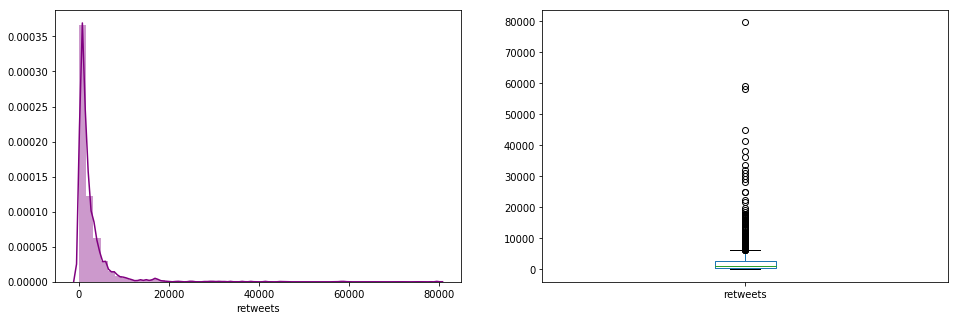

In [162]:
plt.figure(1)
plt.subplot(121)
sns.distplot(archive_clean['retweets'], color = 'purple')

plt.subplot(122)
retweet_dist = archive_clean['retweets'].plot.box(figsize=(16,5))

fig = retweet_dist.get_figure()
fig.savefig('viz/retweet-distribution.png')

plt.show()



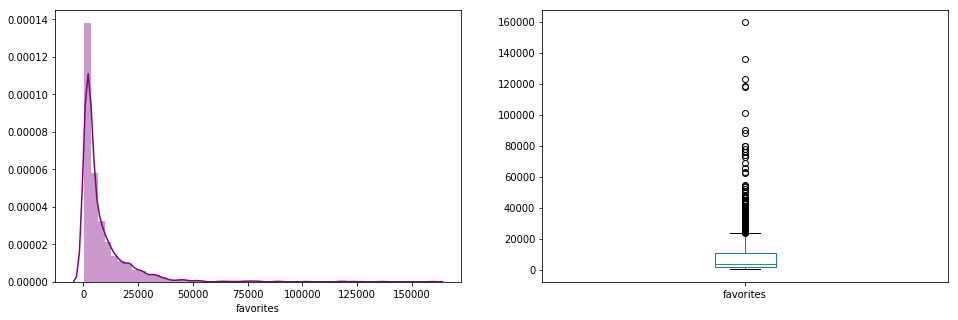

In [163]:
plt.figure(1)
plt.subplot(121)
sns.distplot(archive_clean['favorites'], color = 'purple')


plt.subplot(122)
fav_dist = archive_clean['favorites'].plot.box(figsize=(16,5))

fig = fav_dist.get_figure()
fig.savefig('viz/fav-distribution.png')

plt.show()

<Figure size 432x288 with 0 Axes>

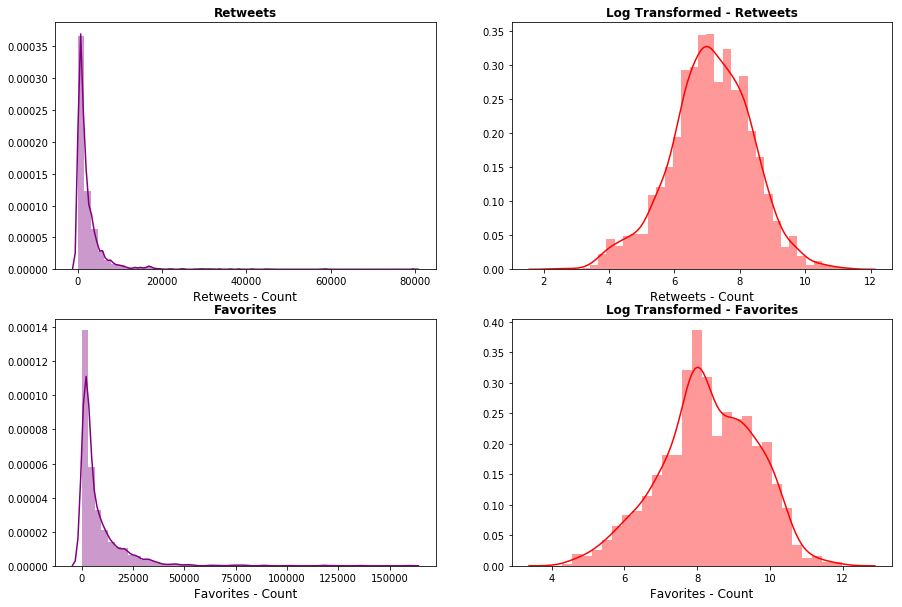

In [164]:
plt.figure(1)
plt.figure(figsize = (15,10))
plt.subplot(221)
sns.distplot(archive_clean.retweets, color = 'purple')
plt.title('Retweets', fontweight="bold", fontsize = 12.0)
plt.xlabel('Retweets - Count', fontsize=12)

plt.subplot(222)
sns.distplot(archive_clean.retweets.apply(np.log), color = 'red')
plt.title('Log Transformed - Retweets', fontweight="bold", fontsize = 12.0)
plt.xlabel('Retweets - Count', fontsize=12)
                                                                    

plt.subplot(223)
retweet_fav_trans = sns.distplot(archive_clean.favorites, color = 'purple')
plt.title('Favorites', fontweight="bold", fontsize = 12.0)
plt.xlabel('Favorites - Count', fontsize=12)

plt.subplot(224)
sns.distplot(archive_clean.favorites.apply(np.log), color = 'red')
plt.title('Log Transformed - Favorites', fontweight="bold", fontsize = 12.0)
plt.xlabel('Favorites - Count', fontsize=12)



fig = retweet_fav_trans.get_figure()
fig.savefig('viz/fav-retweet-trans.png')


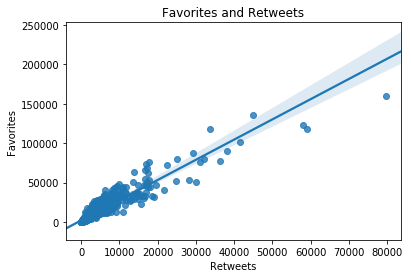

In [165]:
graph = sns.regplot(x=archive_clean.retweets, y=archive_clean.favorites)
plt.title("Favorites and Retweets")
plt.xlabel('Retweets')
plt.ylabel('Favorites')
# sns.plt.show()
fig = graph.get_figure()
fig.savefig('viz/scatterplot.png')

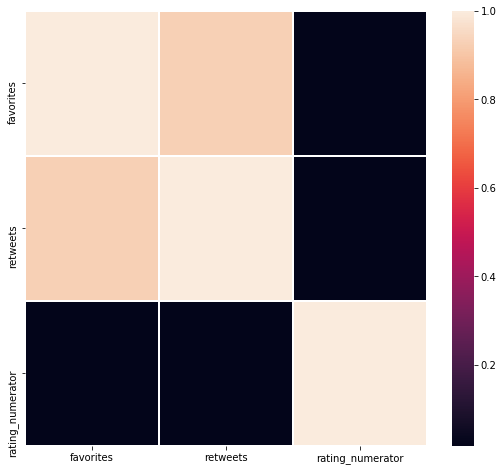

In [166]:
df_corr_values = archive_clean[['favorites', 
                               'retweets','rating_numerator']]

fig, ax = plt.subplots(figsize=(9,8))
correlation = df_corr_values.corr()

corr_mat = sns.heatmap(correlation, 
            xticklabels=correlation.columns.values,
            yticklabels=correlation.columns.values,
            ax=ax,
            linewidth= 0.5);

fig = corr_mat.get_figure()
fig.savefig('viz/heatmap.png')

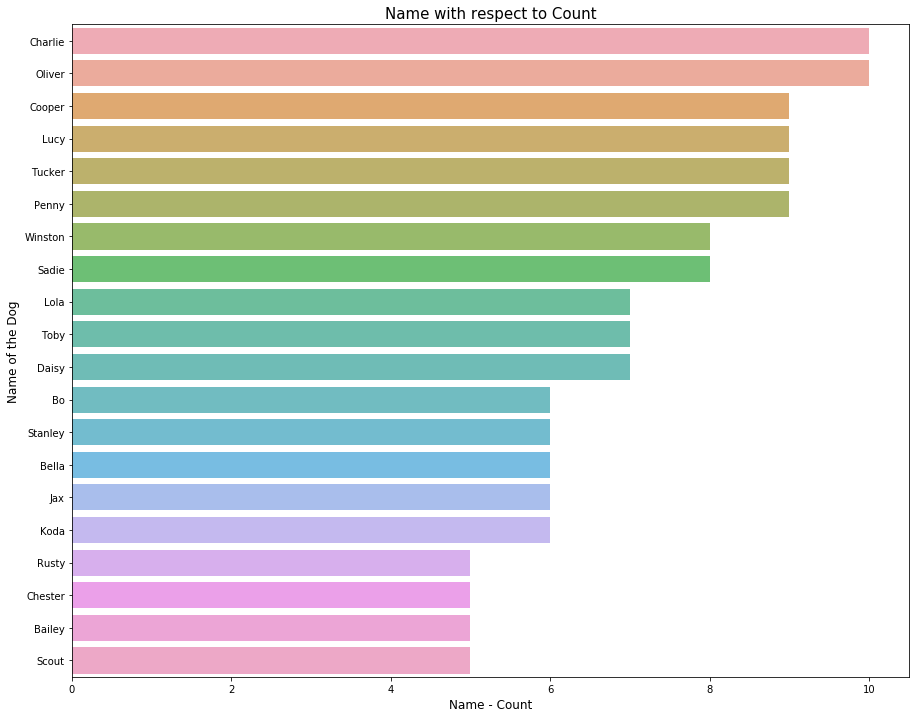

In [168]:
#Dog Name Ranking by Count
all_names = archive_clean[archive_clean['name'] !='None']
name_count = all_names['name'].value_counts().head(20)
plt.figure(figsize=(15,12))
name_bar = sns.barplot(y=name_count.index, x=name_count.values, alpha=0.8)
plt.xlabel('Name - Count', fontsize=12)
plt.ylabel('Name of the Dog', fontsize=12)
plt.title("Name with respect to Count", fontsize=15)
plt.show()

fig = name_bar.get_figure()
fig.savefig('viz/name-bar.png')

In [169]:
all_names['name'].value_counts().head(20)


Charlie    10
Oliver     10
Cooper      9
Lucy        9
Tucker      9
Penny       9
Winston     8
Sadie       8
Lola        7
Toby        7
Daisy       7
Bo          6
Stanley     6
Bella       6
Jax         6
Koda        6
Rusty       5
Chester     5
Bailey      5
Scout       5
Name: name, dtype: int64

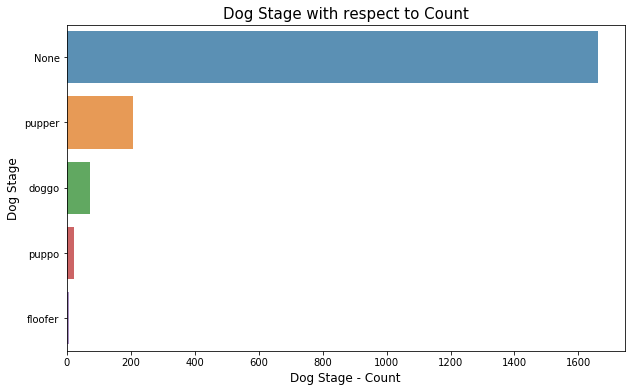

In [170]:
# The Dogtionary Stage Ranking by Count
stage_count = archive_clean['stage'].str.split(',', expand=True).stack().value_counts()
plt.figure(figsize=(10,6))
stage_bar = sns.barplot(y=stage_count.index, x=stage_count.values, alpha=0.8)
plt.xlabel('Dog Stage - Count', fontsize=12)
plt.ylabel('Dog Stage', fontsize=12)
plt.title("Dog Stage with respect to Count", fontsize=15)
plt.show()

fig = stage_bar.get_figure()
fig.savefig('viz/stage-bar.png')

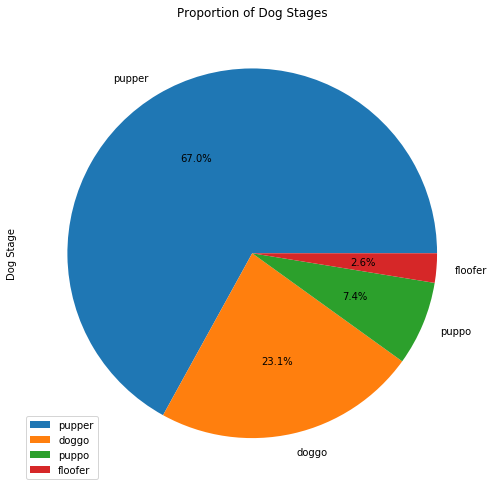

In [171]:
# Proportion of Dog Stages Where Referenced
stage_viz = archive_clean[archive_clean['stage'] != "None"]
fig, ax = plt.subplots(figsize=(8.5,8.5))

stage_pie = stage_viz['stage'].str.split(',', expand=True).stack().value_counts().plot(kind = 'pie', ax = ax, label = 'Dog Stage', autopct='%1.1f%%')
plt.title('Proportion of Dog Stages')
plt.legend();

fig = stage_pie.get_figure()
fig.savefig('viz/stage-pie.png')

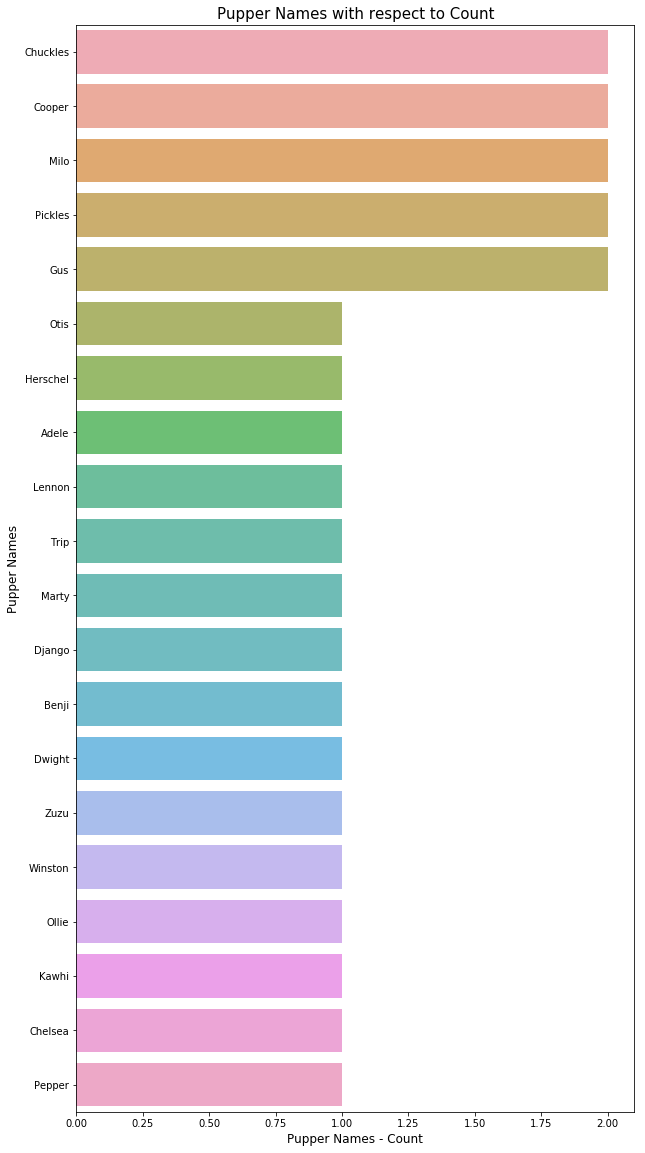

In [172]:
pupper_names = archive_clean[archive_clean['stage'] == 'pupper']
all_pupper_names = pupper_names[pupper_names['name'] != 'None']

# Top Dog_stage values based on the count
name_count = all_pupper_names['name'].value_counts().head(20)
plt.figure(figsize=(10,20))
graph = sns.barplot(y=name_count.index, x=name_count.values, alpha=0.8)
plt.xlabel('Pupper Names - Count', fontsize=12)
plt.ylabel('Pupper Names', fontsize=12)
plt.title("Pupper Names with respect to Count", fontsize=15)
plt.show()

fig = graph.get_figure()
fig.savefig('viz/pupper-name-bar.png')

In [173]:
all_pupper_names['name'].value_counts()

Chuckles    2
Cooper      2
Milo        2
Pickles     2
Gus         2
Otis        1
Herschel    1
Adele       1
Lennon      1
Trip        1
Marty       1
Django      1
Benji       1
Dwight      1
Zuzu        1
Winston     1
Ollie       1
Kawhi       1
Chelsea     1
Pepper      1
Phil        1
Gabe        1
Larry       1
Rory        1
Toffee      1
Edmund      1
Roscoe      1
Ambrose     1
Fletcher    1
Laika       1
           ..
Sansa       1
Grady       1
Kaiya       1
Brandy      1
Millie      1
Oliver      1
Finn        1
Wally       1
Jazz        1
Ashleigh    1
Bo          1
Raymond     1
Godzilla    1
Jamesy      1
Rueben      1
Ava         1
Chet        1
Opal        1
Albert      1
Buckley     1
Sierra      1
Birf        1
Scott       1
Lillie      1
Baloo       1
Louie       1
Lizzie      1
Rover       1
Boomer      1
Aqua        1
Name: name, Length: 112, dtype: int64

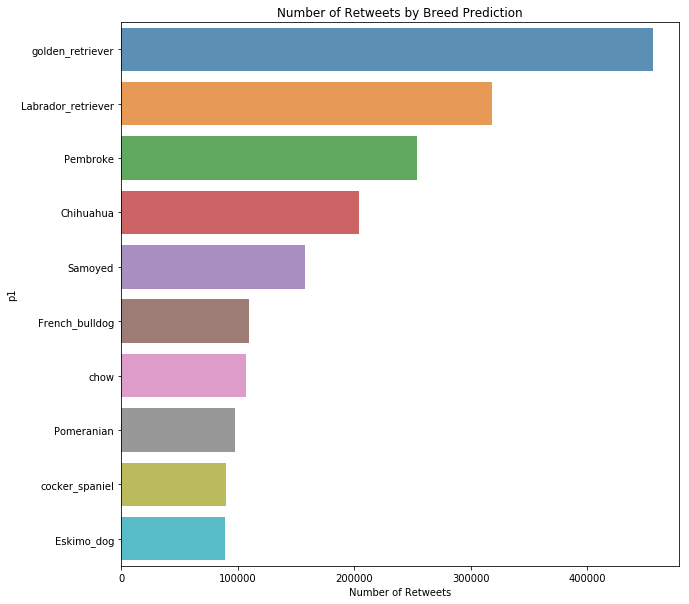

In [174]:
df_retweet = archive_clean.groupby('p1')['retweets'].sum().reset_index()
df_sorted = df_retweet.sort_values('retweets', ascending=False).head(10)
sorted_retweet = df_sorted['retweets']
sorted_breed = df_sorted['p1']

plt.figure(figsize=(10,10))
breed_retweet_bar = sns.barplot(y=sorted_breed, x=sorted_retweet, alpha=0.8)
plt.xlabel('Number of Retweets')
plt.title('Number of Retweets by Breed Prediction')
plt.show();

fig = breed_retweet_bar.get_figure()
fig.savefig('viz/breed-predict-retweet-bar.png')